In [0]:
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [0]:
from NN import *
from utils import get_tf_session
from data_utils import make_batch, single_np_datapoint_generator

import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [0]:
train_dataset_files = [
 './data/tfrecords/0.tfrecord',
 './data/tfrecords/1.tfrecord',
 './data/tfrecords/2.tfrecord',
 './data/tfrecords/3.tfrecord',
 './data/tfrecords/4.tfrecord',
 './data/tfrecords/5.tfrecord',
 './data/tfrecords/6.tfrecord',
 './data/tfrecords/7.tfrecord',
 './data/tfrecords/8.tfrecord',
]

validation_dataset_files = ['./data/tfrecords/9.tfrecord']

In [4]:
X_batch, Y_batch = make_batch(train_dataset_files, 200)
loss_weights = tf.placeholder(dtype=tf.float32, shape=(6,))
no_of_filter_fns=[
    lambda i: 10 + 3 * i
]
train_op, loss = create_yolo_model_graph(X_batch, Y_batch, no_of_filter_fns, loss_weights)
X = tf.placeholder(dtype=tf.float32, shape=(None, None, None, 3))
layers, _, pred = get_yolo_NN(X, no_of_filter_fns)
chk_loc = './models/model_1.ckpt'

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [5]:
sess, saver = get_tf_session(chk_loc)
if tf.test.is_gpu_available():
    print("Tensorflow is able to detect gpu...")

INFO:tensorflow:Restoring parameters from ./models/model_1.ckpt
NOTE: restored variables from checkpoint file!
Tensorflow is able to detect gpu...


In [0]:
avg_loss = 0
print_int = 200
save_int = 1000
st = time.time()
for i in range(5000):
    _, loss_value= sess.run([train_op, loss], feed_dict={loss_weights: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]})
    avg_loss += loss_value
    if i>0 and i%print_int == 0:
        print("Batch No.", i, "Avg loss:", avg_loss/print_int)
        avg_loss = 0
    if i>0 and i%save_int == 0:
        print("Model saved in path: %s" % saver.save(sess, chk_loc))
print("Model saved in path: %s" % saver.save(sess, chk_loc))
print("training took total", time.time() - st, "seconds")

Batch No. 200 Avg loss: 4.7205988311767575
Batch No. 400 Avg loss: 3.7765447652339934
Batch No. 600 Avg loss: 3.5616863787174227
Batch No. 800 Avg loss: 3.4393749928474424
Batch No. 1000 Avg loss: 3.357608082294464
Model saved in path: ./models/model_1.ckpt
Batch No. 1200 Avg loss: 3.298584581613541
Batch No. 1400 Avg loss: 3.257265478372574
Batch No. 1600 Avg loss: 3.2051260471343994
Batch No. 1800 Avg loss: 3.160280998945236
Batch No. 2000 Avg loss: 3.12314169049263
Model saved in path: ./models/model_1.ckpt
Batch No. 2200 Avg loss: 3.0999422454833985
Batch No. 2400 Avg loss: 3.058842558860779
Batch No. 2600 Avg loss: 3.023228381872177
Batch No. 2800 Avg loss: 2.9945799255371095
Batch No. 3000 Avg loss: 2.96802482008934
Model saved in path: ./models/model_1.ckpt
Batch No. 3200 Avg loss: 2.9440547037124634
Batch No. 3400 Avg loss: 2.9228981757164
Batch No. 3600 Avg loss: 2.9072142362594606
Batch No. 3800 Avg loss: 2.882697557210922
Batch No. 4000 Avg loss: 2.8601571393013
Model saved 

In [6]:
print(calculate_yolo_metric(sess, X, pred, validation_dataset_files))

Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 900 images
Processed 1000 images
Processed 1100 images
Processed 1200 images
Processed 1300 images
Processed 1400 images
Processed 1500 images
Processed 1503 images
{'total_count': 1503, 'average_iou': 0.5536752088486505, 'average_false_iou': 1.2664721896994888, 'gender_accuracy': 0.6899534264803726, 'age_accuracy': 0.3140385894876913}


In [0]:
gen = single_np_datapoint_generator(validation_dataset_files)

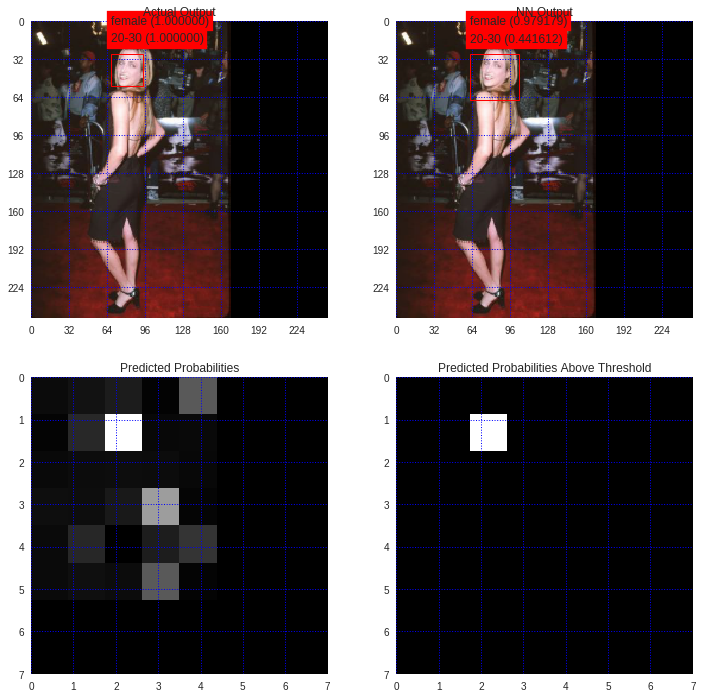

In [8]:
img, out = next(gen)
see_and_compare_yolo_outputs(sess, X, pred, img, out)

In [0]:
tf.saved_model.simple_save(sess, './models/yolo_saved_model', 
                           inputs={"x": X}, 
                           outputs={"pred": pred})